In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Overview: In this Notebook we are going to build models to predict the output of targeted customers based on set of inputs.
   
   ## because it's a classification problem, hence I built 3 logistic regression models and 1 random forest classifier model.
    
    forest: random forest model without "duration" feature
   
                quick analysis of "duration" feature for exploring the contribution of the last contact duration  with the
                customer variable to his decision    
   
   
    log_reg:  without "duration" feature - unscaled numerical inputs
    log_reg1: with "duration"  feature -   scaled numerical inputs
    log_reg2: without "duration" feature- scaled numerical inputs
        
   

# Random Forest Classifier: 
     1. forest: without duration

import the preprocessed data correspondant to the random forest classifier model

In [2]:
rf_data_p=pd.read_csv('C:/Users/Fawzi/Desktop/DG-Project/BD-rf-prep.csv')
rf_data_p.head()

,age,balance,duration,campaign,previous,education,default,housing,loan,admin.,...,technician,unemployed,divorced,married,single,cellular,telephone,day,month,y
0,27,35,255,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,4,7,0
1,54,466,297,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,4,7,0
2,43,105,668,2,0,0,0,0,1,0,...,0,0,0,1,0,1,0,4,7,0
3,31,19,65,2,0,0,0,0,0,0,...,1,0,0,0,1,0,1,4,7,0
4,27,126,436,4,0,0,0,1,1,0,...,1,0,0,0,1,1,0,4,7,0


In [3]:
X=rf_data_p.drop(rf_data_p[['y','duration']],axis=1)
Y=rf_data_p['y']
print(X.shape)

(29967, 26)


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1=train_test_split(X,Y, test_size=0.25,random_state=42)

In [7]:
forest = RandomForestClassifier()
forest.fit(X_train1, Y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_pred_test=forest.predict(X_test1)

In [9]:
accuracy_score(Y_test1, y_pred_test)

0.8635878270154832

## our model has a Test Accuracy of 86%.

In [10]:
data_p = pd.read_csv('C:/Users/Fawzi/Desktop/DG-Project/BD1_p.csv')
data_p.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,27,0,0,35,0,0,4,7,255,1,...,0,0,0,1,0,0,0,0,0,0
1,54,0,0,466,0,0,4,7,297,1,...,1,0,0,0,0,0,0,0,0,0
2,43,0,0,105,0,1,4,7,668,2,...,1,0,0,0,0,0,0,0,0,0
3,31,0,0,19,0,0,4,7,65,2,...,0,0,0,0,0,0,0,0,1,0
4,27,0,0,126,1,1,4,7,436,4,...,0,0,0,0,0,0,0,0,1,0


### Analysing the duration feature: (
    after analysing it we will see that it may be somehow uninterpretable and harm our model. thus We will create two Logistic regression models:
            one with the duration feature: log_reg1
            one without the duration feature: log_reg2 
            we standardized the numerical features for both of them
    

In [11]:
data_p[data_p['duration']<0]

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed


In [12]:
data_p[data_p['duration']>data_p['duration'].mean()].groupby('y')['duration'].count()

y
0    7489
1    3034
Name: duration, dtype: int64

In [13]:
data_p[data_p['duration']>data_p['duration'].median()].groupby('y')['duration'].count()

y
0    11332
1     3635
Name: duration, dtype: int64

In [14]:
data_p[data_p['duration']>1000].groupby('y')['duration'].count()

y
0    162
1    260
Name: duration, dtype: int64

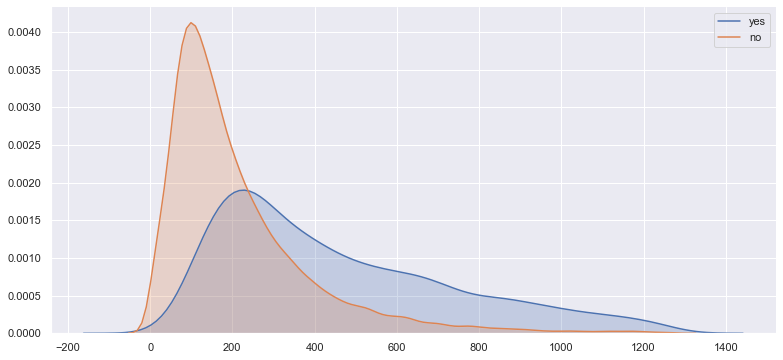

In [15]:
f, ax = plt.subplots(figsize=(13, 6))
sns.despine(f)
sns.kdeplot(data_p[data_p['y']== 1]['duration'], shade=True)
sns.kdeplot(data_p[data_p['y']== 0]['duration'], shade=True)
plt.legend(["yes", "no"])
plt.show()

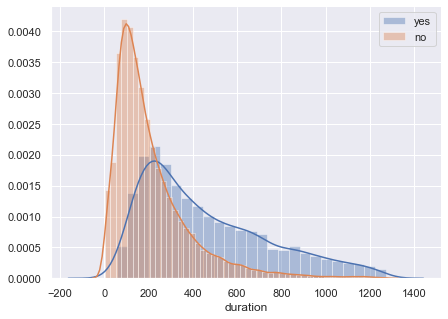

In [16]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.distplot(data_p[data_p['y']== 1]['duration'])
sns.distplot(data_p[data_p['y']== 0]['duration'])
plt.legend(["yes", "no"])
plt.show()

In [17]:
data_p['pdays'].describe()

count    29967.000000
mean        56.840358
std        113.423722
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         47.500000
max        871.000000
Name: pdays, dtype: float64

In [18]:
data_p.columns.values

array(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'telephone', 'married', 'single', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed'], dtype=object)

In [19]:
# checkpoint with this unstandardized data
data_prep=data_p.drop(data_p[['pdays']],axis=1)

In [20]:
data_p1=data_p.copy()

In [21]:
data_p1['pdays'].describe()

count    29967.000000
mean        56.840358
std        113.423722
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         47.500000
max        871.000000
Name: pdays, dtype: float64

In [22]:
data_p1.columns.values

array(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'telephone', 'married', 'single', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed'], dtype=object)

In [23]:
data_p1 = data_p1.reindex(['age',  'balance', 'day',
       'month', 'duration', 'campaign',  'previous', 'pdays', 'default', 'housing', 'loan',
       'telephone', 'married', 'single', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed','education','y'], axis=1)

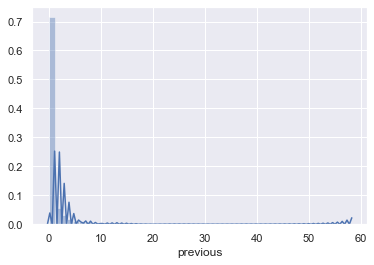

In [24]:
sns.distplot(data_p1['previous'])

In [25]:
data_p1.describe()

,age,balance,day,month,duration,campaign,previous,pdays,default,housing,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,education,y
count,29967.00000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,40.87870,1208.985484,15.848233,6.407548,248.221978,2.547235,0.810692,56.840358,0.016485,0.498582,...,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901,0.341042,0.142423
std,10.90206,1988.111573,8.187582,2.761237,214.462617,2.137149,2.223774,113.423722,0.127333,0.500006,...,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051,0.474067,0.349490
min,18.00000,-8019.000000,1.000000,1.000000,2.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,79.000000,9.000000,5.000000,104.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.00000,464.000000,16.000000,7.000000,180.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.00000,1445.000000,21.000000,8.000000,317.000000,3.000000,1.000000,47.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.00000,13683.000000,31.000000,12.000000,1272.000000,15.000000,58.000000,871.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_p1['pdays'].describe()

count    29967.000000
mean        56.840358
std        113.423722
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         47.500000
max        871.000000
Name: pdays, dtype: float64

In [27]:
data_p1.describe()

,age,balance,day,month,duration,campaign,previous,pdays,default,housing,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,education,y
count,29967.00000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,40.87870,1208.985484,15.848233,6.407548,248.221978,2.547235,0.810692,56.840358,0.016485,0.498582,...,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901,0.341042,0.142423
std,10.90206,1988.111573,8.187582,2.761237,214.462617,2.137149,2.223774,113.423722,0.127333,0.500006,...,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051,0.474067,0.349490
min,18.00000,-8019.000000,1.000000,1.000000,2.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,79.000000,9.000000,5.000000,104.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.00000,464.000000,16.000000,7.000000,180.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.00000,1445.000000,21.000000,8.000000,317.000000,3.000000,1.000000,47.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.00000,13683.000000,31.000000,12.000000,1272.000000,15.000000,58.000000,871.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
x1=data_p1[data_p1["pdays"]>0]

In [29]:
# examinig correlation using .corr() method 
corr_ft = x1[['balance', 'duration', 'campaign',  'previous', 'pdays']]
corr= corr_ft.corr()
display(corr)
### Put in mind that the "pdays"feature is not correlated when we eliminate the "-1" value from it as it has a categorical meaning

,balance,duration,campaign,previous,pdays
balance,1.000000,0.066153,-0.008377,0.010966,-0.131323
duration,0.066153,1.000000,-0.106538,-0.010180,-0.013681
campaign,-0.008377,-0.106538,1.000000,0.184392,0.064448
previous,0.010966,-0.010180,0.184392,1.000000,-0.037325
pdays,-0.131323,-0.013681,0.064448,-0.037325,1.000000


In [30]:
# examinig correlation using .corr() method 
corr_ft = data_p1[['balance', 'duration', 'campaign',  'previous', 'pdays']]
corr= corr_ft.corr()
display(corr)

,balance,duration,campaign,previous,pdays
balance,1.000000,0.040394,-0.033448,0.033335,0.005615
duration,0.040394,1.000000,-0.090084,0.001437,0.004127
campaign,-0.033448,-0.090084,1.000000,-0.028835,-0.103478
previous,0.033335,0.001437,-0.028835,1.000000,0.521170
pdays,0.005615,0.004127,-0.103478,0.521170,1.000000


##### We see here that it's better to drop the "pdays" as we knew from our analysis that it doesn't contribute a lot in the decision of the customer ==> we will drop it 

In [31]:
## Standardization of Numerical features

In [32]:
data_p1=data_p1.drop(data_p1[['pdays']], axis=1)

In [33]:
data_p1.describe()

,age,balance,day,month,duration,campaign,previous,default,housing,loan,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,education,y
count,29967.00000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,40.87870,1208.985484,15.848233,6.407548,248.221978,2.547235,0.810692,0.016485,0.498582,0.166250,...,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901,0.341042,0.142423
std,10.90206,1988.111573,8.187582,2.761237,214.462617,2.137149,2.223774,0.127333,0.500006,0.372311,...,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051,0.474067,0.349490
min,18.00000,-8019.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,79.000000,9.000000,5.000000,104.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.00000,464.000000,16.000000,7.000000,180.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.00000,1445.000000,21.000000,8.000000,317.000000,3.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.00000,13683.000000,31.000000,12.000000,1272.000000,15.000000,58.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Create our first logistic regression model without standardization of Numerical features and without "duration" feature

## log_reg

In [34]:
data_prep.describe()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
count,29967.00000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,40.87870,0.341042,0.016485,1208.985484,0.498582,0.166250,15.848233,6.407548,248.221978,2.547235,...,0.180332,0.032202,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901
std,10.90206,0.474067,0.127333,1988.111573,0.500006,0.372311,8.187582,2.761237,214.462617,2.137149,...,0.384470,0.176539,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051
min,18.00000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,0.000000,0.000000,79.000000,0.000000,0.000000,9.000000,5.000000,104.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.00000,0.000000,0.000000,464.000000,0.000000,0.000000,16.000000,7.000000,180.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.00000,1.000000,0.000000,1445.000000,1.000000,0.000000,21.000000,8.000000,317.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.00000,1.000000,1.000000,13683.000000,1.000000,1.000000,31.000000,12.000000,1272.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
data_prep.columns.values

array(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'previous', 'y', 'telephone',
       'married', 'single', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed'], dtype=object)

In [36]:
data_prep=data_prep.drop(data_prep[['duration']],axis=1)
data_prep.shape

(29967, 24)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [38]:
inputs=data_prep.drop(['y'],axis=1)
target=data_prep['y']

In [39]:
inputs.shape

(29967, 23)

In [40]:
X_train,X_test, Y_train,Y_test=train_test_split(inputs,target,test_size=0.25,random_state=365)

In [41]:
log_reg=LogisticRegression(max_iter=200)

In [42]:
log_reg.fit(X_train,Y_train)

C:\Users\Fawzi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
log_reg.score(X_train,Y_train)

0.8550834260289211

In [44]:
log_reg.score(X_test,Y_test)

0.859183128670582

# Scaling our numerical inputs and building 2 LogisticRegression models
    log_reg1 and log_reg2

## Standardize the numerical features

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [47]:
numerical_features=data_p1[['age',  'balance', 'day',
       'month', 'duration', 'campaign',  'previous']]

In [48]:
scaler.fit(numerical_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
scaled_num=scaler.transform(numerical_features)

In [50]:
scaled_num

array([[-1.27305591, -0.59051267, -1.44712207, ...,  0.03160521,
        -0.72398372, -0.36456272],
       [ 1.20358166, -0.37372041, -1.44712207, ...,  0.2274468 ,
        -0.72398372, -0.36456272],
       [ 0.19458117, -0.55530279, -1.44712207, ...,  1.95738088,
        -0.25606283, -0.36456272],
       ...,
       [ 2.85467337,  2.26651751,  0.14067476, ...,  4.09764973,
         1.14769985,  0.98451744],
       [ 1.47876361, -0.27211476,  0.14067476, ...,  1.21131767,
         0.67977896, -0.36456272],
       [-0.35578274,  0.88629026,  0.14067476, ...,  0.52587209,
        -0.25606283,  4.58206454]])

In [51]:
scaled_num.shape

(29967, 7)

In [52]:
data_p1[['age',  'balance', 'day','month', 'duration', 'campaign',  'previous']]=scaled_num

In [53]:
data_p1.head()

,age,balance,day,month,duration,campaign,previous,default,housing,loan,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,education,y
0,-1.273056,-0.590513,-1.447122,0.214564,0.031605,-0.723984,-0.364563,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1.203582,-0.373720,-1.447122,0.214564,0.227447,-0.723984,-0.364563,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.194581,-0.555303,-1.447122,0.214564,1.957381,-0.256063,-0.364563,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.906147,-0.598561,-1.447122,0.214564,-0.854345,-0.256063,-0.364563,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.273056,-0.544740,-1.447122,0.214564,0.875589,0.679779,-0.364563,0,1,1,...,0,0,0,0,0,0,1,0,0,0


## Splitting the standardized (data_p1) data :

In [54]:
inputs_scaled=data_p1.drop(['y'],axis=1)
targets=data_p1['y']

In [55]:
inputs_scaled.shape

(29967, 24)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.25,random_state=365)

## Building our first LogisticRegression model:
###   log_reg1 with "duration"

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
log_reg1=LogisticRegression()

In [59]:
log_reg1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
log_reg1.score(x_train,y_train)

0.8652280311457174

In [61]:
log_reg1.score(x_test,y_test)

0.8717298451681794

### Creating summary table

In [62]:
log_reg1.intercept_

array([-1.56607915])

In [63]:
log_reg1.coef_

array([[ 0.06940336,  0.137966  , -0.07701635, -0.05888299,  0.98170695,
        -0.36204758,  0.29498892, -0.50659779, -0.93069559, -0.67974654,
        -0.11281818, -0.05109842,  0.26827645, -0.64182195, -0.71458851,
        -0.61612012, -0.37392507,  0.21428619, -0.56002643, -0.36120576,
         0.46084928, -0.32857047, -0.27558221,  0.37718696]])

In [64]:
feature_names=inputs_scaled.columns.values

In [65]:
summary_table=pd.DataFrame(columns=['feature name'], data=feature_names)
summary_table['coefficient']=np.transpose(log_reg1.coef_)


In [66]:
summary_table.index=summary_table.index + 1
summary_table.loc[0]=['Intercept', log_reg1.intercept_[0]]
summary_table['odds_ratio']=np.exp(summary_table['coefficient'])
summary_table

,feature name,coefficient,odds_ratio
1,age,0.069403,1.071868
2,balance,0.137966,1.147937
3,day,-0.077016,0.925875
4,month,-0.058883,0.942817
5,duration,0.981707,2.669008
6,campaign,-0.362048,0.696249
7,previous,0.294989,1.343111
8,default,-0.506598,0.602542
9,housing,-0.930696,0.394279
10,loan,-0.679747,0.506745


### Very important Note:
 to interpret the table we should know that we must compare the dummies with dropped feature.
    because the dropped first feature  <--> is a banshmark to the dummies of that feature
    for example: let's take marital feature:
        in marital we must compare them to the divorced value
        --> the odds of a single person  is 1.3 times higher than if he is divorced or widowed

## Building Logistic Regression without "duration" feature
    log_reg2   

In [67]:
inputs_scaled2=data_p1.drop(data_p1[['y','duration']],axis=1)
targets2=data_p1['y']

In [68]:
inputs_scaled2.shape

(29967, 23)

In [69]:
inputs_scaled2.describe()
# as we can see we dropped the duration feature

,age,balance,day,month,campaign,previous,default,housing,loan,telephone,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,education
count,2.996700e+04,2.996700e+04,2.996700e+04,2.996700e+04,2.996700e+04,2.996700e+04,29967.000000,29967.000000,29967.000000,29967.000000,...,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000,29967.000000
mean,7.716396e-17,-1.367289e-15,-9.776289e-15,-8.691051e-14,-9.670977e-15,-6.817637e-14,0.016485,0.498582,0.166250,0.085961,...,0.032202,0.028331,0.234892,0.053859,0.037107,0.085594,0.021557,0.179698,0.030901,0.341042
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.127333,0.500006,0.372311,0.280311,...,0.176539,0.165920,0.423938,0.225743,0.189028,0.279768,0.145234,0.383942,0.173051,0.474067
min,-2.098602e+00,-4.641661e+00,-1.813537e+00,-1.958412e+00,-7.239837e-01,-3.645627e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.144193e-01,-5.683807e-01,-8.364310e-01,-5.097614e-01,-7.239837e-01,-3.645627e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.723281e-01,-3.747264e-01,1.853654e-02,2.145639e-01,-2.560628e-01,-3.645627e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.532178e-01,1.187149e-01,6.292276e-01,5.767265e-01,2.118581e-01,8.513066e-02,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.964402e+00,6.274408e+00,1.850610e+00,2.025377e+00,5.826909e+00,2.571765e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
from sklearn.model_selection import train_test_split
x_train2,x_test2, y_train2,y_test2=train_test_split(inputs_scaled2,targets2,test_size=0.25,random_state=365)

In [71]:
log_reg2=LogisticRegression()

In [72]:
log_reg2.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
feature_names=inputs_scaled2.columns.values

In [74]:
summary_table=pd.DataFrame(columns=['feature name'], data=feature_names)
summary_table['coefficient']=np.transpose(log_reg2.coef_)


In [75]:
summary_table.index=summary_table.index + 1
summary_table.loc[0]=['Intercept', log_reg2.intercept_[0]]
summary_table['odds_ratio']=np.exp(summary_table['coefficient'])
summary_table

,feature name,coefficient,odds_ratio
1,age,0.071825,1.074468
2,balance,0.150503,1.162418
3,day,-0.078210,0.924771
4,month,-0.049475,0.951729
5,campaign,-0.348373,0.705836
6,previous,0.242934,1.274985
7,default,-0.442611,0.642357
8,housing,-0.774162,0.461090
9,loan,-0.602188,0.547612
10,telephone,-0.255339,0.774654


In [77]:
log_reg2.score(x_test2,y_test2)

0.8607848371596369

## After having tried to improve the accuracy of the model by dropping the data features to test the effect of each dropped feature, to prevent overfitting on 1 of the features, per given time, we still obtained the same model prediction accuracy which was 85%



# I suggest to use the "forest" model which is the RandomForestClassifier with accuracy of 86%. 
# we should make more testing and used other model types, for example we can study if there is overfitting by using cross validation method.
# we can also built a classification model using TensorFlow where we can clearly observe the errors in both training and validation set
# Then we can make a confusion matrix and get the probabilities of the new_data we want to predict, and start studying cost and profit from an expected value  framework approach